In [1]:
from pl_modules.diffusers_vae_module import WeightedSSIMKspaceAutoencoder, WeightedSSIMKspaceAutoencoderKL, KspaceAutoencoder, KspaceAutoencoderKL
from pl_modules.unet_module import UNet
from pathlib import Path

def extract_between_first_two_slashes(path: str) -> str:
    """
    Extracts the substring between the first and second '/' in a given string.
    
    Example:
        "UNet/77iwp3bt/checkpoints/epoch=99-step=6000.ckpt" -> "77iwp3bt"
    """
    parts = path.split('/')
    if len(parts) < 3:
        raise ValueError("Input string must contain at least two '/' characters")
    return parts[0],parts[1]

def load_model(model_type: str, ckpt_path: Path, undersampling: bool = False):
    if model_type == "UNet":
        model = UNet.load_from_checkpoint(ckpt_path, undersampling=undersampling, strict=False)
    elif model_type =="KspaceAutoencoder":
        model = KspaceAutoencoder.load_from_checkpoint(ckpt_path, undersampling=undersampling, strict=False)
    elif model_type == "WeightedSSIMKspaceAutoencoder":
        model = WeightedSSIMKspaceAutoencoder.load_from_checkpoint(ckpt_path, undersampling=undersampling, strict=False)
    elif model_type == "KspaceAutoencoderKL":
        model = KspaceAutoencoderKL.load_from_checkpoint(ckpt_path, undersampling=undersampling, strict=False)
    elif model_type == "WeightedSSIMKspaceAutoencoderKL":
        model = WeightedSSIMKspaceAutoencoderKL.load_from_checkpoint(ckpt_path, undersampling=undersampling, strict=False)
    else:
        print("No model found")
        raise ValueError("Invalid input provided")
    
    for p in model.parameters():
        p.requires_grad = False
    
    return model

/home/atuin/b180dc/b180dc46/software/private/conda/envs/kdiff/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from pl_modules.ldm_module import LDM
first_stage = load_model("WeightedSSIMKspaceAutoencoderKL", "WeightedSSIMKspaceAutoencoderKL/b63zsecl/checkpoints/WeightedSSIMKspaceAutoencoderKL-epoch=66.ckpt", undersampling=True)
fs = load_model("WeightedSSIMKspaceAutoencoderKL", "WeightedSSIMKspaceAutoencoderKL/utr2dmhv/checkpoints/WeightedSSIMKspaceAutoencoderKL-epoch=31.ckpt", undersampling=True)
ldm = LDM.load_from_checkpoint("LDM_/xfv8d48c/checkpoints/last.ckpt", first_stage=first_stage)

/home/atuin/b180dc/b180dc46/software/private/conda/envs/kdiff/lib/python3.10/site-packages/torch/cuda/__init__.py:734: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/atuin/b180dc/b180dc46/software/private/conda/envs/kdiff/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/atuin/b180dc/b180dc46/software/private/conda/envs/kdiff/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
Undersamling: True
Start global step for discriminator: 5000
Weights for Loss: P: 0.3 | S: 0.7 | KL: 1e-06 | D: 0.5
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
Channels:  (128, 128, 256, 512)
Z shape:  torch.Size([1, 16, 80, 48])
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
Undersamling: True
Start global step for discriminator: 5000
Weights for Loss: P: 0.3 | S: 0.7 | KL: 1e-06 | D: 0.5
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
Channels:  (128, 256, 512)
Z shape:  torch.Size([1, 16, 160, 96])
Rescaling latents


In [24]:
ae_ckpts = [
    "KspaceAutoencoder/1477y5so/checkpoints/KspaceAutoencoder-epoch=32.ckpt", 
    "KspaceAutoencoder/efxwfisc/checkpoints/KspaceAutoencoder-epoch=30.ckpt",
    "KspaceAutoencoder/emkjiw54/checkpoints/KspaceAutoencoder-epoch=29.ckpt"]

sae_ckpts = [
    "WeightedSSIMKspaceAutoencoder/8fvbciuk/checkpoints/WeightedSSIMKspaceAutoencoder-epoch=36.ckpt",
    "WeightedSSIMKspaceAutoencoder/malxq0c1/checkpoints/WeightedSSIMKspaceAutoencoder-epoch=13.ckpt",
    "WeightedSSIMKspaceAutoencoder/yxusji86/checkpoints/WeightedSSIMKspaceAutoencoder-epoch=42.ckpt"
]

vae_ckpts = [
    # "KspaceAutoencoderKL/5xovkqf3/checkpoints/KspaceAutoencoderKL-epoch=00.ckpt",
    "KspaceAutoencoderKL/tnyvxepp/checkpoints/KspaceAutoencoderKL-epoch=02.ckpt",
    # "KspaceAutoencoderKL/vuwzswa8/checkpoints/KspaceAutoencoderKL-epoch=25.ckpt"
]

unet_ckpts = [
    "UNet/77iw30sm/checkpoints/UNet-epoch=79.ckpt",
    "UNet/hdzt9rut/checkpoints/UNet-epoch=09.ckpt",
    "UNet/pcoj4e7y/checkpoints/UNet-epoch=21.ckpt"
]

svae_ckpts = [
    "WeightedSSIMKspaceAutoencoderKL/9fkym2v7/checkpoints/WeightedSSIMKspaceAutoencoderKL-epoch=65.ckpt",
    "WeightedSSIMKspaceAutoencoderKL/b63zsecl/checkpoints/WeightedSSIMKspaceAutoencoderKL-epoch=66.ckpt",
    # "WeightedSSIMKspaceAutoencoderKL/gmnryi4i/checkpoints/WeightedSSIMKspaceAutoencoderKL-epoch=74.ckpt",
    # "WeightedSSIMKspaceAutoencoderKL/qu0dvox4/checkpoints/WeightedSSIMKspaceAutoencoderKL-epoch=55.ckpt",
    "WeightedSSIMKspaceAutoencoderKL/rojsgaoo/checkpoints/WeightedSSIMKspaceAutoencoderKL-epoch=34.ckpt",
    "WeightedSSIMKspaceAutoencoderKL/utr2dmhv/checkpoints/WeightedSSIMKspaceAutoencoderKL-epoch=31.ckpt"
]

In [24]:
from fastmri.data.mri_data import SliceDataset
from modules.transforms import KspaceUNetDataTransform, kspace_to_mri
from fastmri.data.subsample import create_mask_for_mask_type
import torch
import matplotlib.pyplot as plt
from pathlib import Path
acc = 8
# ckpts = vae_ckpts
undersampling = False
mask_func = create_mask_for_mask_type(
    mask_type_str="equispaced",
    center_fractions=[0.08],
    accelerations=[acc]
)
transform = KspaceUNetDataTransform(mask_func=mask_func)
dataset = SliceDataset(
    root=Path("/home/janus/iwbi-cip-datasets/shared/fastMRI/knee/singlecoil_val"),
    challenge="singlecoil",
    transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, num_workers=2)

# for ckpt in ckpts:
#     model_type, id = extract_between_first_two_slashes(ckpt)
#     model = load_model(model_type=model_type, ckpt_path=ckpt, undersampling=undersampling)

#     if undersampling:
#         output_dir = Path("evaluation") / model_type / id / "images" / str(acc)
#     else:
#         output_dir = Path("evaluation") / model_type / id / "images" / "full"
#     output_dir.mkdir(parents=True, exist_ok=True)
for i, batch in enumerate(dataloader):
    if i > 50:
        break
    if batch.fname[0] == "file1000000.h5":
        if batch.slice_num.item() == 19:
            output = kspace_to_mri(batch.masked_kspace)
            target = batch.target
            target = target / torch.max(target)
            output = output / torch.max(output)
            error = torch.abs(target - output)
            error = error / torch.max(error)
            plt.imshow(output.squeeze(0), cmap="gray")    
            plt.axis("off")
            plt.tight_layout()
            plt.savefig((f"{acc}_" + str(batch.fname[0][:-3]) +  "_" + str(batch.slice_num.item()) + ".png") , bbox_inches="tight", dpi=1000, pad_inches=0)
            plt.close()
            # plt.imshow(target.squeeze(0), cmap="gray")    
            # plt.axis("off")
            # plt.tight_layout()
            # plt.savefig((f"{acc}_target_" + str(batch.fname[0][:-3]) +  "_" + str(batch.slice_num.item()) + ".png") , bbox_inches="tight", dpi=1000, pad_inches=0)
            # plt.close()
            # plt.imshow(error.squeeze(0), cmap="inferno")  
            # # plt.colorbar()  
            # plt.axis("off")
            # plt.tight_layout()
            # plt.savefig((f"{acc}_error_" + str(batch.fname[0][:-3]) +  "_" + str(batch.slice_num.item()) + ".png") , bbox_inches="tight", dpi=1000, pad_inches=0, transparent=True)
            # plt.close()

In [13]:
from modules.transforms import kspace_to_mri
for i, batch in enumerate(dataloader):
        if i > 50:
            break
        if batch.fname[0] == "file1000000.h5":
            if batch.slice_num.item() == 21 or batch.slice_num.item() == 27:
                masked_kspace = batch.masked_kspace
                target = batch.target
                masked = kspace_to_mri(masked_kspace)
                masked = masked / torch.max(masked)
                target = target / torch.max(target)
                error = torch.abs(target - masked)
                error = error / torch.max(error)

                plt.imshow(masked.squeeze(0), cmap="gray")  
                # plt.colorbar()  
                plt.axis("off")
                plt.tight_layout()
                plt.savefig(("masked_" + str(batch.fname[0][:-3]) +  "_" + str(batch.slice_num.item()) + ".png") , bbox_inches="tight", dpi=1000, pad_inches=0, transparent=True)
                plt.close()

                plt.imshow(error.squeeze(0), cmap="inferno")  
                # plt.colorbar()  
                plt.axis("off")
                plt.tight_layout()
                plt.savefig(("masked_error_" + str(batch.fname[0][:-3]) +  "_" + str(batch.slice_num.item()) + ".png") , bbox_inches="tight", dpi=1000, pad_inches=0, transparent=True)
                plt.close()


In [13]:
from typing import Union, Optional, Tuple, List
import torch
from pl_modules.diffusers_vae_module import WeightedSSIMKspaceAutoencoder, WeightedSSIMKspaceAutoencoderKL
from diffusers import DiffusionPipeline
from pl_modules.ldm_module import LDM
from diffusers.schedulers import DDPMScheduler, DDIMScheduler
from modules.transforms import unnorm, norm

class ConsistencyGuidance:
    def __init__(
        self, 
        first_stage: WeightedSSIMKspaceAutoencoderKL | WeightedSSIMKspaceAutoencoder,
        p: int = 200, 
        scale: float = 0.2, 
        ) -> "ConsistencyGuidance":

        self.scale = scale
        self.p = p
        self.first_stage = first_stage
    
    def __call__(
        self, 
        z_hat: torch.Tensor, 
        reference_kspace: torch.Tensor,  
        mask: torch.Tensor, 
        t: int,
        norm_params: Tuple[torch.Tensor, torch.Tensor],
        ) -> torch.Tensor:


        k_hat = self.first_stage.decode(z_hat)
        k_hat = unnorm(k_hat, norm_params[0], norm_params[1]).permute(0, 2, 3, 1).contiguous()

        zero = torch.zeros(1, 1, 1, 1, 1).to(k_hat)
        k_hat = k_hat - torch.where(mask, k_hat - reference_kspace, zero)
        k_hat, mean, std = norm(k_hat.permute(0, 3, 1, 2).contiguous())
        return self.first_stage.encode(k_hat)[0], (mean, std)
    
def index_of(tensor: torch.Tensor, value: torch.Tensor):
    idx = (tensor == value.item()).nonzero(as_tuple=True)[0]
    return idx.item() if idx.numel() > 0 else -1  # return -1 if not found
    
class ConsistencyGuidanceSampler(DiffusionPipeline):
    def __init__(
            self, ldm: LDM, 
            scheduler: DDIMScheduler | DDPMScheduler, 
            num_inference_steps: int = 50,
            cgs: bool = False,
            guidance_scale: int = 10, 
        ):

        super().__init__()
            
        self.register_modules(
            unet=ldm.model, 
            scheduler=scheduler,  
            first_stage=ldm.first_stage,
        )
        self.scheduler.set_timesteps(1000)
        self.num_inference_steps = num_inference_steps
        self.rescale_latents = ldm.rescale_latents
        self.cgs = cgs
        self.guidance_scale = guidance_scale

    
    @torch.no_grad()
    def __call__(
        self,
        batch: KspaceUNetDataTransform,
        timesteps: int =  None,
        generator: Optional[Union[torch.Generator, List[torch.Generator]]] = None,
        **kwargs,
    ) ->  Tuple:
        if timesteps is not None:
            self.num_inference_steps = timesteps

        k = batch.masked_kspace.permute(0, 3, 1, 2).contiguous()
        k, mean, std = norm(k)
        z_hat = self.first_stage.encode(k)[0]

        rescale_factor = 1.0

        if self.rescale_latents:
            print("Rescaling latents")
            rescale_factor = (1.0 / z_hat.flatten().std())

        # set step values
        z_hat = rescale_factor * z_hat
        noise = torch.randn_like(z_hat)
        t = torch.tensor([self.num_inference_steps])
        z_hat = self.scheduler.add_noise(z_hat, noise, t).contiguous()
        
        for t in self.progress_bar(self.scheduler.timesteps[index_of(self.scheduler.timesteps,t):]):
            # 1. predict noise model_output
            model_output = self.unet(z_hat, t).sample

            # 2. compute previous image: x_t -> x_t-1
            z_hat = self.scheduler.step(model_output, t, z_hat, generator=generator).prev_sample

            if self.cgs:
                if t > 80:
                    if t % 20 == 0:
                        z_hat = z_hat / rescale_factor 

                        k_hat = self.first_stage.decode(z_hat)

                        k_hat = unnorm(k_hat, mean, std).permute(0, 2, 3, 1).contiguous()

                        zero = torch.zeros(1, 1, 1, 1).to(k_hat)
                        
                        # plt.imshow(kspace_to_mri(k_hat).squeeze(0), cmap="gray")
                        # plt.show()

                        k_hat = k_hat - torch.where(batch.mask, k_hat - batch.masked_kspace, zero)

                        # plt.imshow(kspace_to_mri(k_hat).squeeze(0), cmap="gray")
                        # plt.show()

                        k_hat, mean, std = norm(k_hat.permute(0, 3, 1, 2).contiguous())

                        z_hat = self.first_stage.encode(k_hat)[0]

                        z_hat = z_hat * rescale_factor
                elif t > 30 :
                    with torch.enable_grad():
                        pred_x0 = z_hat.clone().detach()
                        pred_x0.requires_grad_(True)

                        pred_x0 = pred_x0 / rescale_factor
                        k_hat = unnorm(self.first_stage.decode(pred_x0), mean, std).permute(0,2,3,1).contiguous()
                        zero  = torch.zeros_like(k_hat)
                        soft_dc = torch.where(batch.mask, k_hat - batch.masked_kspace, zero)
                        loss = soft_dc.pow(2).sum()
                        # print(loss)
                        g = -torch.autograd.grad(loss, pred_x0)[0]*self.guidance_scale
                    with torch.no_grad():
                        z_hat = (z_hat + g).detach()


        # image = (image / 2 + 0.5).clamp(0, 1)
        z_hat = z_hat / rescale_factor
        # z_hat = unnorm(z_hat, mean_z, std_z)
        kspace = self.first_stage.decode(z_hat)
        kspace = unnorm(kspace, mean, std)
        kspace = kspace.permute(0, 2, 3, 1).contiguous()
        return kspace
    
          

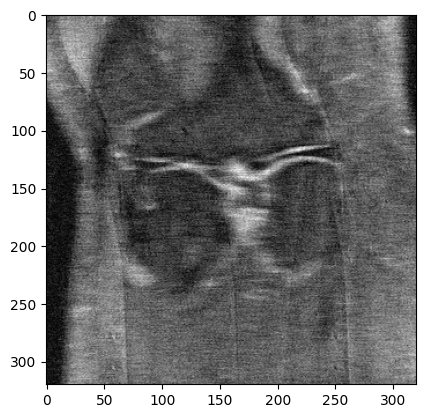

In [8]:
from fastmri.pl_modules import FastMriDataModule
from fastmri.data.subsample import create_mask_for_mask_type
from pathlib import Path
from modules.transforms import KspaceUNetDataTransform, kspace_to_mri

config = {
    "mask_type": "equispaced",
    "center_fractions": [0.08],
    "accelerations": [4],
}

mask_func = create_mask_for_mask_type(
    config["mask_type"], config["center_fractions"], config["accelerations"]
)
# use random masks for train transform, fixed masks for val transform
train_transform = KspaceUNetDataTransform(mask_func=mask_func, use_seed=False)
val_transform = KspaceUNetDataTransform(mask_func=mask_func)
test_transform = KspaceUNetDataTransform()
data_module = FastMriDataModule(
    data_path=Path("/home/janus/iwbi-cip-datasets/shared/fastMRI/knee/"),
    challenge="singlecoil",
    train_transform=train_transform,
    val_transform=val_transform,
    test_transform=test_transform,
    combine_train_val=False,
    test_split="test",
    sample_rate=None,
    batch_size=1,
    num_workers=4,
    distributed_sampler=False,
    use_dataset_cache_file=True
)

for batch in data_module.train_dataloader():
    plt.imshow(kspace_to_mri(batch.masked_kspace).squeeze(0), cmap="gray")
    plt.show()
    break

In [9]:
cgs = ConsistencyGuidanceSampler(ldm, ldm.scheduler)
output_1 = cgs(batch, 50)

Rescaling latents


  2%|▏         | 1/51 [00:00<00:10,  4.68it/s]

100%|██████████| 51/51 [00:07<00:00,  6.76it/s]


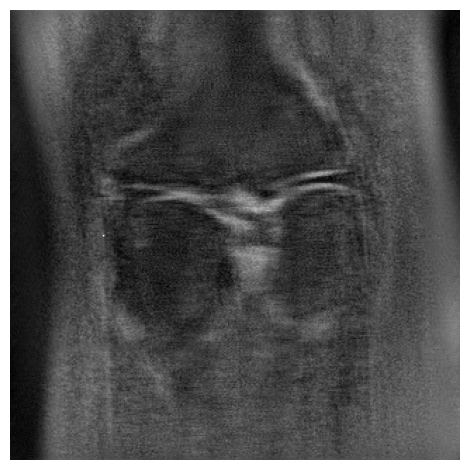

In [10]:
from modules.transforms import kspace_to_mri
plt.imshow(kspace_to_mri(output_1).squeeze(0), cmap="gray")
plt.axis("off")
plt.tight_layout()
plt.show()

In [14]:
cgs_dc = ConsistencyGuidanceSampler(ldm, ldm.scheduler, cgs=True, guidance_scale=100)
output = cgs_dc(batch, 100)

Rescaling latents


100%|██████████| 101/101 [02:36<00:00,  1.55s/it]


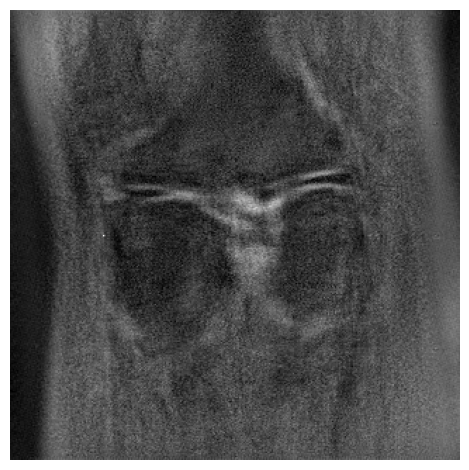

: 

In [ ]:
from modules.transforms import kspace_to_mri
plt.imshow(kspace_to_mri(output).squeeze(0), cmap="gray")
plt.axis("off")
plt.tight_layout()
plt.show()

In [39]:
def run_vae(first_stage, k, mask, reference):
    k, mean, std = norm(k.permute(0, 3, 1, 2).contiguous())
    temp = first_stage.decode(first_stage.encode(k)[0])
    reconstructed_kspace = unnorm(temp, mean, std).permute(0, 2, 3, 1).contiguous()
    # reconstructed_kspace = reconstructed_kspace - torch.where(mask, reconstructed_kspace - reference, torch.zeros(1,1,1,1))
    plt.imshow(kspace_to_mri(reconstructed_kspace).squeeze(0), cmap="gray")
    plt.show()
    return reconstructed_kspace

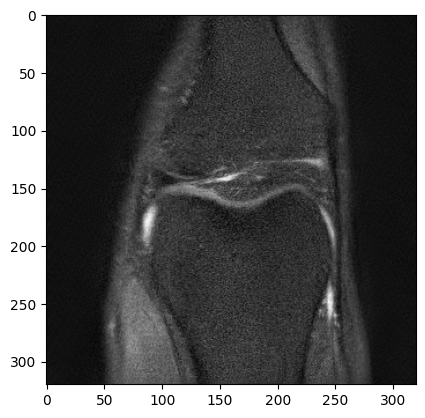

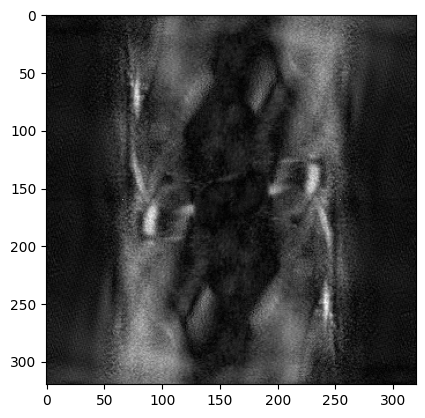

In [40]:
output = run_vae(first_stage, batch.full_kspace, batch.mask, batch.masked_kspace)
output = run_vae(first_stage, output, batch.mask, batch.masked_kspace)

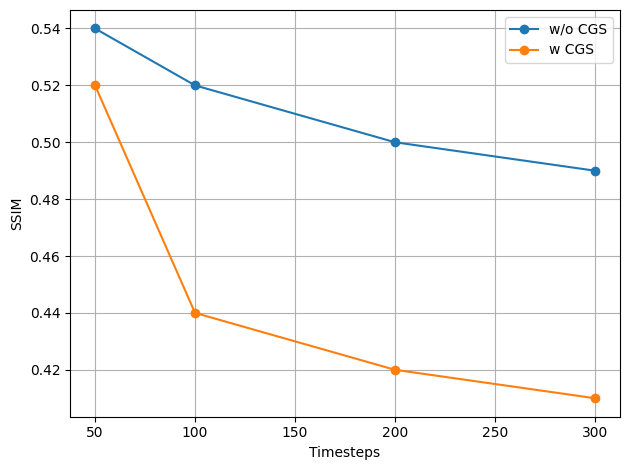

In [13]:
import matplotlib.pyplot as plt

# timesteps
T = [50, 100, 200, 300]

# metric values (replace with yours)
model1_no = [0.54, 0.52, 0.50, 0.49]
model2_cgs = [0.52, 0.44, 0.42, 0.41]

# create plot
plt.figure()
plt.plot(T, model1_no, marker='o', label='w/o CGS')
plt.plot(T, model2_cgs, marker='o', label='w CGS')

plt.xlabel("Timesteps")
plt.ylabel("SSIM")
plt.legend()
plt.tight_layout()
plt.grid(True)

# save to disk
plt.savefig("model_comparison_ssim.pdf", dpi=1000, bbox_inches='tight', pad_inches=0)

# display
plt.show()

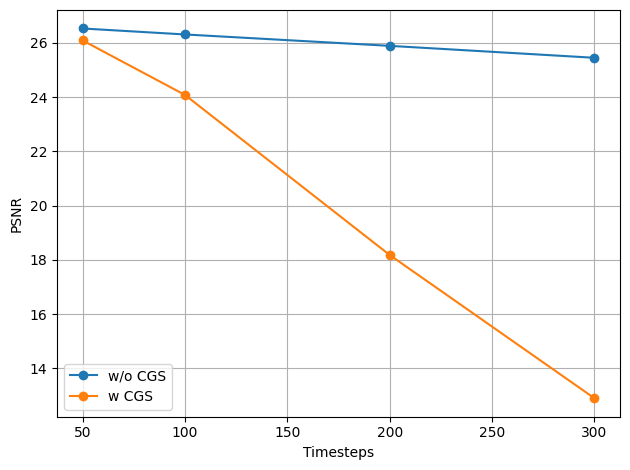

In [12]:
import matplotlib.pyplot as plt

# timesteps
T = [50, 100, 200, 300]

# metric values (replace with yours)
model1_no = [26.53, 26.31, 25.89, 25.45]
model2_cgs = [26.09, 24.08, 18.18, 12.90]

# create plot
plt.figure()
plt.plot(T, model1_no, marker='o', label='w/o CGS')
plt.plot(T, model2_cgs, marker='o', label='w CGS')

plt.xlabel("Timesteps")
plt.ylabel("PSNR")
plt.legend()
plt.tight_layout()
plt.grid(True)

# save to disk
plt.savefig("model_comparison_psnr.pdf", dpi=1000, bbox_inches='tight', pad_inches=0)

# display
plt.show()